In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [42]:
path = Path('/storage/class_herbs_v5/')

In [43]:
fns = get_image_files(path)  #image files downloaded from iamge downloader

In [44]:
failed = verify_images(fns)

In [45]:
failed

(#0) []

In [46]:
failed.map(Path.unlink)

(#0) []

In [47]:
herbs = DataBlock(    #fastai uses datablocks which are groups of images
    blocks=(ImageBlock, CategoryBlock), #creates image and category
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.05, seed=42),    #very small validation percent used here for model deployment
    get_y=parent_label, #uses parent folder name to get labels
    item_tfms=Resize(128)) #functions applied to each image

In [48]:
dls = herbs.dataloaders(path)

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


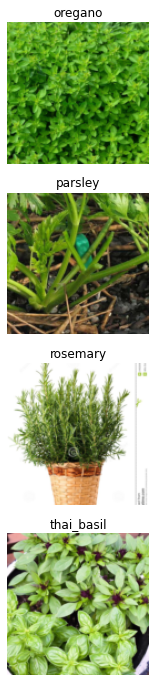

In [49]:
dls.valid.show_batch(max_n=4, nrows = 4)

In [50]:
herbs = herbs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = herbs.dataloaders(path)   #update with some additional transformations

In [51]:
learn = cnn_learner(dls,resnet18,metrics=error_rate,pretrained=True)    #resnet 18 used here for speed

In [52]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.075644,1.429552,0.457447,00:16


epoch,train_loss,valid_loss,error_rate,time
0,1.654693,1.152131,0.351064,00:16
1,1.358539,1.142796,0.361702,00:17
2,1.153741,1.137946,0.276596,00:14
3,0.984276,1.091808,0.276596,00:15


In [53]:
learn.unfreeze()

SuggestedLRs(lr_min=1.58489319801447e-07, lr_steep=7.585775847473997e-07)

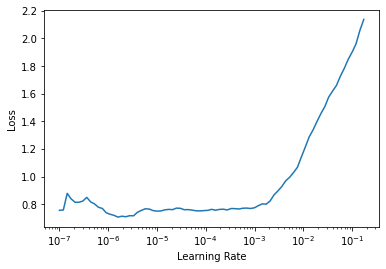

In [54]:
learn.lr_find()

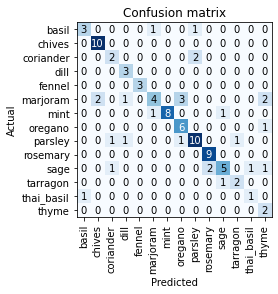

In [55]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [14]:
cleaner = ImageClassifierCleaner(learn)
cleaner   #cleaner can be used when building model to remove pictures with incorrect labels

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


FileNotFoundError: [Errno 2] No such file or directory: '/storage/class_herbs_v5/marjoram/00000043.jpg'

FileNotFoundError: [Errno 2] No such file or directory: '/storage/class_herbs_v5/marjoram/00000095.jpg'

In [26]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [56]:
learn.export()